In [1]:
import pandas as pd
import heartpy as hp
import matplotlib.pyplot as plt

sample_rate = 500

In [2]:
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
df = pd.read_csv("MUSE_20211119_134612_49000.csv")
df.columns = [col.strip() for col in df.columns]
df.drop(columns=[""], inplace=True)
df.head()

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,-24,-19,4,21,-14,-7,-244,43,-24,-58,-48,-34
1,-53,-24,29,39,-41,2,-244,29,-39,-73,-68,-48
2,-19,-4,14,12,-17,4,-248,29,-39,-78,-58,-43
3,39,39,0,-39,19,19,-244,39,-34,-63,-43,-29
4,14,29,14,-21,0,21,-263,14,-63,-82,-68,-53


In [4]:
df.shape

(5000, 12)

In [5]:
df = df / 1000.0

In [6]:
df.describe()

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.001446,0.001662,0.000270,-0.001565,0.000577,0.000984,0.008663,0.005109,0.002855,-0.001027,0.001697,0.002272
std,0.066417,0.131697,0.080363,0.096203,0.033172,0.103874,0.093465,0.096512,0.416871,0.344654,0.284399,0.222559
min,-0.209000,-0.258000,-0.117000,-0.722000,-0.200000,-0.158000,-0.668000,-0.673000,-2.298000,-1.576000,-1.083000,-0.766000
25%,-0.039000,-0.063000,-0.039000,-0.017000,-0.017000,-0.046000,-0.004000,-0.009000,-0.117000,-0.165000,-0.122000,-0.092000
50%,-0.009000,-0.029000,-0.019000,0.019000,0.002000,-0.024000,0.024000,0.014000,-0.068000,-0.107000,-0.092000,-0.068000
75%,0.024000,0.014000,0.009000,0.046000,0.021000,0.007000,0.048000,0.043000,0.082000,0.058000,-0.009000,-0.014000
max,0.380000,1.063000,0.697000,0.229000,0.109000,0.873000,0.258000,0.200000,1.093000,1.317000,1.498000,1.322000


<AxesSubplot:ylabel='V6'>

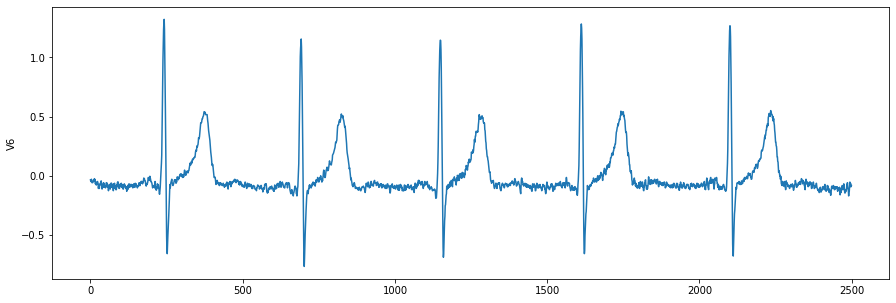

In [7]:
import seaborn as sns

sns.lineplot(data=df["V6"][:2500])

In [8]:
data = df["V6"]

/home/samet/Desktop/YBUProject/venv/lib/python3.8/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

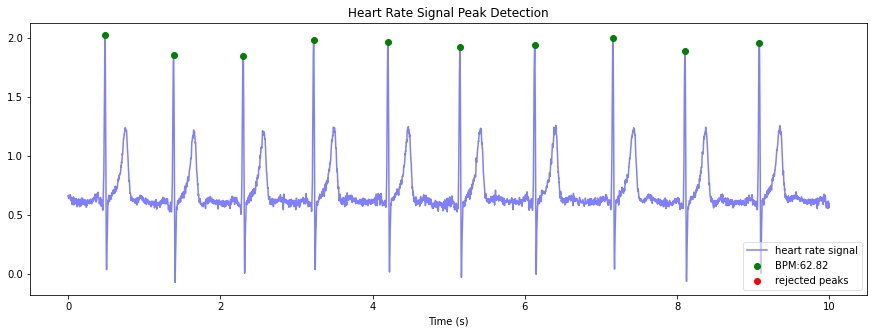

bpm: 62.819916
ibi: 955.111111
sdnn: 37.179578
sdsd: 19.868316
rmssd: 41.557190
pnn20: 0.750000
pnn50: 0.125000
hr_mad: 28.000000
sd1: 28.607254
sd2: 42.466163
s: 3816.533441
sd1/sd2: 0.673648
breathingrate: 0.232666


In [9]:
#run analysis
wd, m = hp.process(data, sample_rate)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)
plt.show()

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

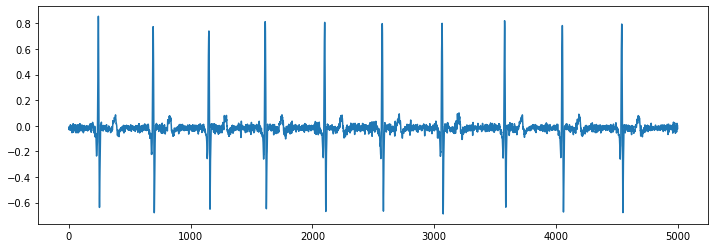

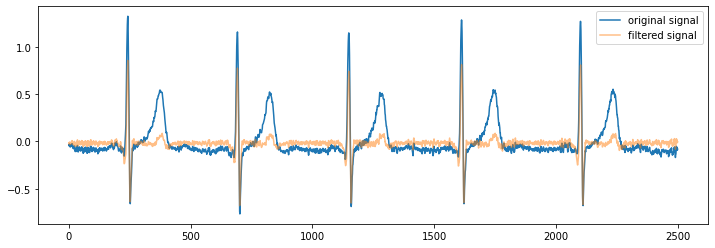

In [10]:
filtered = hp.filter_signal(data, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')

#visualize again
plt.figure(figsize=(12,4))
plt.plot(filtered)
plt.show()

#and zoom in a bit
plt.figure(figsize=(12,4))
plt.plot(data[0:2500], label = 'original signal')
plt.plot(filtered[0:2500], alpha=0.5, label = 'filtered signal')
plt.legend()
plt.show()


nonlinear poincare measures:
sd1: 28.607254
sd2: 42.466163
s: 3816.533441
sd1/sd2: 0.673648


/home/samet/Desktop/YBUProject/venv/lib/python3.8/site-packages/heartpy/visualizeutils.py:299: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


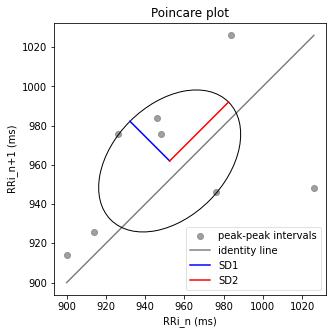

In [11]:
hp.plot_poincare(wd, m)

#print poincare measures
poincare_measures = ['sd1', 'sd2', 's', 'sd1/sd2']
print('\nnonlinear poincare measures:')
for measure in poincare_measures:
    print('%s: %f' %(measure, m[measure]))